### Requies UPDATE!
Possible Data Leakager during k-fold CV

## 5.8 Resampling - SMOTE

As the ratio of two classes are roughly 80:20, we will investigate if resampling with SMOTE would improve F1 score.

In [72]:
from imblearn.over_sampling import SMOTE

print("Before Oversampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train == 1)))

sm = SMOTE(sampling_strategy='minority', random_state=SEED)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After Oversampling, counts of label '1': {} \n".format(sum(y_train_res == 1)))

Before Oversampling, counts of label '0': 29006
Before Oversampling, counts of label '1': 3712 

After Oversampling, counts of label '0': 29006
After Oversampling, counts of label '1': 29006 



In [74]:
%%time
models = ScaleModel('standard')
print('Accuracy Score:')
names_1, results_accu = BaselineAccuracy(X_train_res, y_train_res, models)
print('----------------------------')
print('F1 Score:')
names_2, results_f1 = BaselineF1(X_train_res, y_train_res, models)

Accuracy Score:
standardLR: 0.883024 (0.002951)
standardSVM: 0.901520 (0.003284)
standardKNN: 0.917862 (0.003619)
standardLDA: 0.865700 (0.004116)
standardCART: 0.907140 (0.003509)
standardAB: 0.890695 (0.002652)
standardGBM: 0.893436 (0.003012)
standardRF: 0.943357 (0.001706)
standardET: 0.943064 (0.001873)
----------------------------
F1 Score:
standardLR: 0.882658 (0.002975)
standardSVM: 0.901399 (0.003292)
standardKNN: 0.917858 (0.003620)
standardLDA: 0.864790 (0.004196)
standardCART: 0.907190 (0.003741)
standardAB: 0.890692 (0.002654)
standardGBM: 0.893427 (0.003015)
standardRF: 0.943510 (0.002460)
standardET: 0.943498 (0.002303)
CPU times: user 26min 41s, sys: 1min 9s, total: 27min 51s
Wall time: 26min 26s


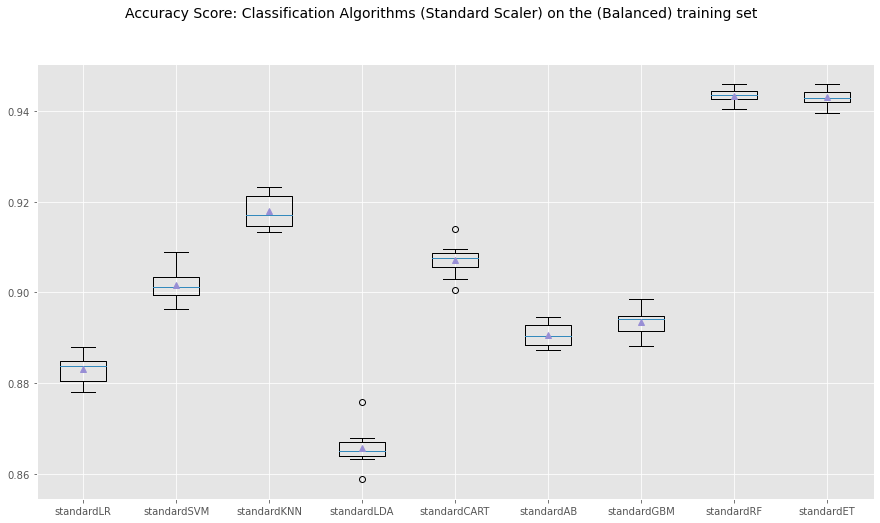

In [75]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Accuracy Score: Classification Algorithms (Standard Scaler) on the (Balanced) training set', fontsize=14)
ax = fig.add_subplot(111)
plt.boxplot(results_accu, showmeans=True)
ax.set_xticklabels(names_1)
plt.show()

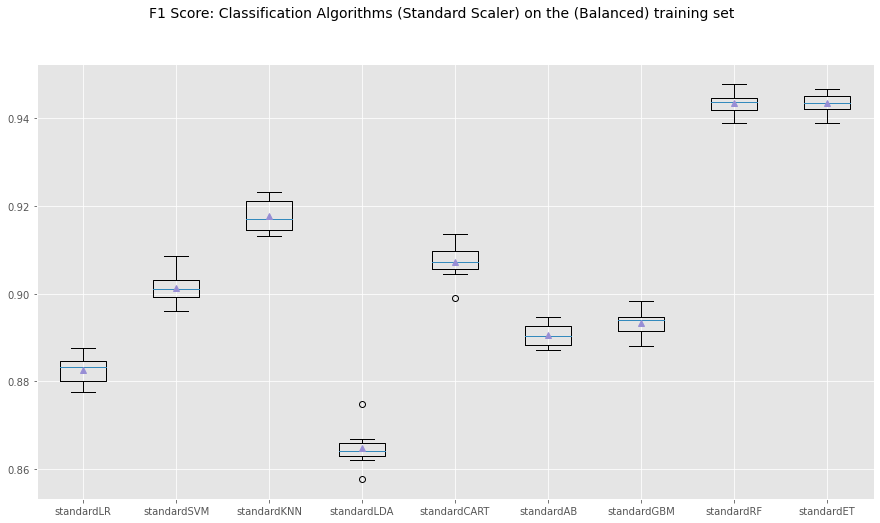

In [78]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('F1 Score: Classification Algorithms (Standard Scaler) on the (Balanced) training set', fontsize=14)
ax = fig.add_subplot(111)
plt.boxplot(results_f1, showmeans=True)
ax.set_xticklabels(names_2)
plt.show()

In [77]:
smote_score = ScoreDF(names_1, results_accu, results_f1)
compareModels3 = pd.concat([basedline_score, scaled_score, minmax_score, smote_score], axis=1)
compareModels3

,Model,Accuacy,F1,Model,Accuacy,F1,Model,Accuacy,F1,Model,Accuacy,F1
0,LR,0.8958,0.6423,standardLR,0.8960,0.6427,minmaxLR,0.8953,0.6277,standardLR,0.8830,0.8827
1,SVM,0.8889,0.5163,standardSVM,0.8937,0.5979,minmaxSVM,0.8865,0.4718,standardSVM,0.9015,0.9014
2,KNN,0.8921,0.6645,standardKNN,0.8891,0.6285,minmaxKNN,0.8846,0.5486,standardKNN,0.9179,0.9179
3,LDA,0.8959,0.6827,standardLDA,0.8959,0.6827,minmaxLDA,0.8959,0.6827,standardLDA,0.8657,0.8648
4,CART,0.8658,0.6705,standardCART,0.8659,0.6712,minmaxCART,0.8661,0.6707,standardCART,0.9071,0.9072
5,AB,0.8957,0.6731,standardAB,0.8957,0.6731,minmaxAB,0.8957,0.6731,standardAB,0.8907,0.8907
6,GBM,0.9027,0.7053,standardGBM,0.9027,0.7053,minmaxGBM,0.9027,0.7051,standardGBM,0.8934,0.8934
7,RF,0.8987,0.6833,standardRF,0.8973,0.6857,minmaxRF,0.8987,0.6841,standardRF,0.9434,0.9435
8,ET,0.8928,0.6434,standardET,0.8922,0.6470,minmaxET,0.8923,0.6451,standardET,0.9431,0.9435


After the class balance, **RandomForest** and **Extra Tree Classifier** show the best prediction in terms of F1 score. 